# Netflix Project 

In this project I request the data of my family account on netflix.com. Once the zip file is received, I import the data into the jupyter ecosystem and continue with the appropriate cleaning and preparation process, and then descriptively analyze the data in order to know which are the favorite movies and series of each user.

## Section 1 - Data Cleaning

In [26]:
import pandas as pd
import numpy as np

data = pd.read_csv("ViewingActivity.csv")
data.columns

'''
Users -> Column Name: 'Profile Name'
'''
# Delete all the rows with a user that is not Enzo (myself), Alcides (Dad) or Alfiery (brother). 
data["Profile Name"].value_counts() # get rid of rows where Profile Name = "Luciano"
bad_user_data = data[ data["Profile Name"] == "Luciano"].index
data.drop(bad_user_data, inplace=True)

##### The edited dataframe only displays data for the 3 desired users. However, I (Enzo) share my user with a Russian friend (Zhuzha), so I gotta find the way for the program to identify those rows of data and associate it with a new user (that I'm going to create as well). So, there will be 4 users in total again, with the addition of my friend Zhuzha.  

In [27]:
data["Country"].value_counts() 

PE (Peru)                    5458
US (United States)           1813
RU (Russian Federation)       747
ES (Spain)                      6
AE (United Arab Emirates)       4
GB (United Kingdom)             3
NL (Netherlands)                1
Name: Country, dtype: int64

##### My dad lives in Peru and my brother and I both go to school in the US. So it totally makes sense to assume that my friend has only watch netflix on Russia. I went to Spain twice and my brother went to the UAE and UK, which explains the values in such countries. 

##### I still don't know why Netherlands appears there but it's something I'll investigate later'

##### * For the record: I went to Italy, Hungary, Austria, and Germany this year as well but I was too busy actually enjoying the trip unlike  my brother that did have time to log on netflix haha*

In [28]:
counter = 0

while counter < len(data["Country"]):
    if data["Country"][counter] == "RU (Russian Federation)":   # Look for rows with 'RU (Russian Federation) in their country column
        data["Profile Name"][counter] = "Zhuzha"     # Change the profile name if condition is met
    counter += 1    
        
data["Profile Name"].value_counts()     

Alcides    5485
Enzo       1069
Zhuzha      747
Bruno       731
Name: Profile Name, dtype: int64

##### More deep cleaning on my user's data is needed:

In [29]:
# separate my data
enzo_user_data = data[ data["Profile Name"] == "Enzo"]
final_data = data[data["Profile Name"] != "Enzo"]

##### I also share my user account with a friend here in Ohio, so I need to find a way to get rid of those records.  For that, I'll be looking at the 'Device Type', and only keep those devices that I used or use, which are:

In [30]:
enzo_user_data["Device Type"].value_counts()

Apple iPad 6th Gen 9.7 (Wi-Fi) iPad            436
Netflix Chrome MAC (Cadmium) HTML 5            283
Chrome PC (Cadmium)                            134
Apple iPhone 8 Plus (CDMA)                      61
Sony PS4                                        45
Apple iPhone XR                                 41
Amazon TVAFTBL Smart TV                         23
Samsung 2018 Kant-M2 UHD TV (1.5G) Smart TV     20
LG 2017 LG M16p Standard UHD TV Smart TV        18
Netflix Firefox MAC (Cadmium) HTML 5             4
Samsung CE 2020 Kant-S2 UHD TV Smart TV          2
Samsung 2016 Hawk-M DTV Smart TV                 2
Name: Device Type, dtype: int64

In [31]:
list_devices = ['Apple iPad 6th Gen 9.7 (Wi-Fi) iPad', 'Netflix Chrome MAC (Cadmium) HTML 5', 'Sony PS4', 'Apple iPhone XR',
                'Netflix Firefox MAC (Cadmium) HTML 5']

# I also share my user account with a friend here in Ohio, so I need to find a way to get rid of that 
enzo_user_data = enzo_user_data[enzo_user_data["Device Type"].isin(list_devices)]
enzo_user_data["Device Type"].value_counts() # data cleaned and kept the correct index, now I just have to bring it back to the original dataframe

Apple iPad 6th Gen 9.7 (Wi-Fi) iPad     436
Netflix Chrome MAC (Cadmium) HTML 5     283
Sony PS4                                 45
Apple iPhone XR                          41
Netflix Firefox MAC (Cadmium) HTML 5      4
Name: Device Type, dtype: int64

In [32]:
# append the data to the "final_data" dataframe -> 
final_data = final_data.append(enzo_user_data, ignore_index=True)
len(final_data) # len of 7772 confirmed. Ready for Next step of the analysis

final_data["Profile Name"].value_counts()

Alcides    5485
Enzo        809
Zhuzha      747
Bruno       731
Name: Profile Name, dtype: int64

##### My mom has a user associated with a different account. I had her requesting the data on her own and will extract it from a different dataset to include it into the analysis.

In [33]:
# Import my mom's data (separate account) to include it in the analysis.
mom_data = pd.read_csv("MAViewingActivity.csv")

# Delete data associated with Kids username
bad_mom_data = mom_data[ mom_data["Profile Name"] == "Kids"].index
mom_data.drop(bad_mom_data, inplace=True)

# append the data to the final_data dataset.
final_data = final_data.append(mom_data, ignore_index=True)
final_data["Profile Name"].value_counts()

# export data to a csv file
# final_data["Profile Name"].value_counts()

Alcides    5485
Enzo        809
Zhuzha      747
Bruno       731
Magaly      149
Name: Profile Name, dtype: int64

## Section 2 - Data Cleaning

In [35]:
# ------------ Rename and drop columns ---------------------

# keep only the columns that we will need
final_data.columns = ['name', 'start', 'duration', 'attrs', 'title', 'svt', 'device', 'bookmark', 'latestbookmark', 'country'] 
final_data = final_data.drop(['attrs', 'svt', 'bookmark', 'latestbookmark'], axis = 1)
final_data

,name,start,duration,title,device,country
0,Alcides,11/2/22 0:01,0:00:10,War_hook_primary_16x9,LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru)
1,Alcides,11/1/22 23:50,0:00:48,Asesino solitario,LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru)
2,Alcides,11/1/22 23:47,0:00:40,War_hook_primary_16x9,LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru)
3,Alcides,11/1/22 23:45,0:01:28,Tráiler: Sin novedad en el frente,LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru)
4,Alcides,11/1/22 23:44,0:00:49,War_hook_primary_16x9,LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru)
...,...,...,...,...,...,...
7916,Magaly,2022-09-13 09:13:00,00:00:05,Premoniciones,Samsung 2016 Hawk-M DTV Smart TV,PE (Peru)
7917,Magaly,2022-09-13 09:11:31,00:00:07,Gladbeck: El drama de los rehenes,Samsung 2016 Hawk-M DTV Smart TV,PE (Peru)
7918,Magaly,2022-09-13 09:09:50,00:00:04,Manifiesto: Temporada 1: Piloto (Capítulo 1),Samsung 2016 Hawk-M DTV Smart TV,PE (Peru)
7919,Magaly,2022-09-13 09:08:52,00:00:28,Temporada 5 (Clip): Cobra Kai,Samsung 2016 Hawk-M DTV Smart TV,PE (Peru)


### Just want to display records in which the show was watched by more than 5 minutes, for accuracy.

In [36]:
# create functions for times (string format HH:MM:SS to seconds, minutes, and hours

def time_string_to_secs(time_string):
    time_string = time_string.split(":")
    return (int(time_string[0]) * 3600) + (int(time_string[1]) * 60) + int(time_string[2])

def time_string_to_mins(time_string):
    time_string = time_string.split(":")
    return (int(time_string[0]) * 3600) + int(time_string[1])

def time_string_to_hours(time_string):
    time_string = time_string.split(":")
    return float(time_string[0]) + float(time_string[1]) / 60

final_data["duration_mins"] = final_data.duration.map(time_string_to_mins)
final_data["duration_secs"] = final_data.duration.map(time_string_to_secs)


final_data = final_data.loc[final_data["duration_mins"] >= 5] # filter the dataset so only shows those over 5 min
final_data.head() # now is only showing only those > 5 minutes

,name,start,duration,title,device,country,duration_mins,duration_secs
6,Alcides,11/1/22 22:58,0:43:11,Planeta furioso: Temporada 1: Huracán (Capítul...,LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru),43,2591
7,Alcides,11/1/22 22:09,0:48:56,Planeta furioso: Temporada 1: Terremoto (Capít...,LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru),48,2936
8,Alcides,11/1/22 21:27,0:41:55,Planeta furioso: Temporada 1: Volcán (Capítulo 2),LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru),41,2515
9,Alcides,11/1/22 20:41,0:46:14,Planeta furioso: Temporada 1: Tornado (Capítul...,LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru),46,2774
26,Alcides,10/31/22 0:18,1:22:14,Terror a 47 metros: El segundo ataque,LG 2017 LG M16p Standard UHD TV Smart TV,PE (Peru),3622,4934


### Creating different dataframes for each user

In [38]:
# separate the dataset based on name values -> ['Alcides' 'Bruno' 'Zhuzha' 'Enzo' 'Magaly']
list_users = list(final_data["name"].unique())

# was trying to do it through a foor loop but didn't find the way to dynamically change the variable names through the iteration
df_alcides = final_data.loc[final_data["name"] == 'Alcides']
df_bruno = final_data.loc[final_data["name"] == 'Bruno']
df_zhuzha = final_data.loc[final_data["name"] == 'Zhuzha']
df_enzo = final_data.loc[final_data["name"] == 'Enzo']
df_magaly = final_data.loc[final_data["name"] == 'Magaly']

### General Stats: Total History Watch Time

In [40]:
def total_time(df_selected):
    total_time_watch_min = df_selected["duration_secs"].sum() / 60
    total_time_watch_hours = total_time_watch_min / 60
    return total_time_watch_hours

print(f'''Total time (in history):
      
      Enzo: {round(total_time(df_enzo),1)} hrs
      Alcides: {round(total_time(df_alcides),1)} hrs
      Magaly: {round(total_time(df_magaly),1)}  hrs
      Bruno: {round(total_time(df_bruno),1)} hrs 
      Zhuzha: {round(total_time(df_zhuzha),1)} hrs
      '''
           )

Total time (in history):
      
      Enzo: 307.8 hrs
      Alcides: 2688.5 hrs
      Magaly: 61.0  hrs
      Bruno: 246.5 hrs 
      Zhuzha: 154.1 hrs
      


### Content-type Stats: Movies vs TV Shows/Series

In [44]:
# ------------------ TOP PLAYED ALL CONTENT -----------------------------

# create function
def total_plays(df):
    df.loc[:, 'plays'] = df.title.map(df.title.value_counts())
    df.loc[:, 'count'] = 1
    sorted_by_plays = df.loc[df.title.duplicated() == False]
    sorted_by_plays = sorted_by_plays.sort_values('plays', ascending=False)
    return sorted_by_plays.head(6)    

# Keep in mind, here we will have to manually input the dataset from the user we want to analyze. In this Case: ENZO (Mine)
total_plays(df_enzo)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,name,start,duration,title,device,country,duration_mins,duration_secs,plays,count
7092,Enzo,5/30/22 20:24,0:07:56,Greatest Events of WWII in Colour: Season 1: B...,Apple iPad 6th Gen 9.7 (Wi-Fi) iPad,US (United States),7,476,6,1
7112,Enzo,5/27/22 18:21,0:24:55,Greatest Events of WWII in Colour: Season 1: B...,Apple iPad 6th Gen 9.7 (Wi-Fi) iPad,US (United States),24,1495,6,1
7100,Enzo,5/29/22 17:29,0:06:04,Greatest Events of WWII in Colour: Season 1: S...,Apple iPad 6th Gen 9.7 (Wi-Fi) iPad,US (United States),6,364,5,1
7053,Enzo,8/13/22 1:43,0:23:38,The Imitation Game,Apple iPad 6th Gen 9.7 (Wi-Fi) iPad,US (United States),23,1418,5,1
7433,Enzo,6/12/21 3:16,0:10:23,World War II in Colour: Season 1: The Gatherin...,Sony PS4,US (United States),10,623,5,1
7109,Enzo,5/28/22 0:38,0:49:36,Greatest Events of WWII in Colour: Season 1: P...,Apple iPad 6th Gen 9.7 (Wi-Fi) iPad,US (United States),49,2976,4,1


### TOP played movies

In [65]:
# ----------------- TOP PLAYED MOVIES ----------------------------
def total_play_movies(df):
    non_series_df = pd.DataFrame(df.loc[df.title.str.contains(": Season") == False])
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(": Book") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" \(Episode ") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" : Episode ") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" : Part ") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" \(Chapter ") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" : Chapter ") == False]
    
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(": Temporada") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(": Libro") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" \(Capítulo ") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" : Capítulo ") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" : Parte ") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" : Episodio ") == False]
    non_series_df = non_series_df.loc[non_series_df.title.str.contains(" \(Episodio ") == False]
    
    non_series_df.loc[:, 'plays'] = df.title.map(df.title.value_counts())
    non_series_df = non_series_df.loc[non_series_df.title.duplicated() == False]
    nonSeriesDf = non_series_df.sort_values('plays', ascending=False)
    return non_series_df

# apply to all the users
enzo_top_movies = total_play_movies(df_enzo)
alcides_top_movies = total_play_movies(df_alcides)
bruno_top_movies = total_play_movies(df_bruno)
zhuzha_top_movies = total_play_movies(df_zhuzha)
magaly_top_movies = total_play_movies(df_magaly)

# sort the values in order for visualization
enzo_top_movies = enzo_top_movies.sort_values(by='plays', ascending=False)
enzo_top_movies_df = enzo_top_movies[['name', 'title', 'plays']].head(5) # see the most 5 watched movies

enzo_top_movies_df

,name,title,plays
7053,Enzo,The Imitation Game,5
7043,Enzo,The Pursuit of Happyness,4
7365,Enzo,"Take the Ball, Pass the Ball",3
7031,Enzo,The Figo Affair: The Transfer that Changed Foo...,3
7058,Enzo,The Social Network,3


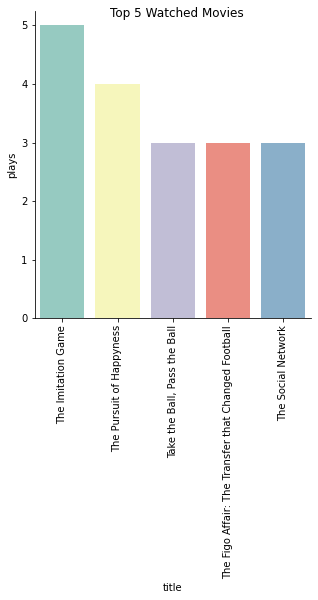

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.catplot(data=enzo_top_movies_df, x="title", y="plays", kind="bar", palette="Set3")
a.set_xticklabels(rotation=90)
a.fig.suptitle('Top 5 Watched Movies')
plt.show()

### TOP Played Series

In [59]:
# --------------------- TV SHOWS/SERIES ----------------------

# set each episode name to just the series name

# create function to identify those records with they keywords involved
def df_series(df):
    final_data_1 = df   
    ts = final_data_1.title.str
    series_df = pd.DataFrame(final_data_1.loc[
        ts.contains(': Season') | ts.contains(': Book') | ts.contains(': Part') | ts.contains(' \(Episode') | ts.contains(': Episode')| ts.contains(' \(Chapter ') | ts.contains(': Chapter') | ts.contains(': Temporada ') | ts.contains(': Libro') | ts.contains(' \(Capítulo') | ts.contains(': Capítulo') | ts.contains(': Parte') | ts.contains(': Episodio ') | ts.contains(" \(Episodio ")
        ])
    return series_df

series_df = df_series(df_enzo) # create a dataset for series (in this case only for Enzo)

# second function to get rid of those keywords previously to identify the Series
def get_clean_series_name(title):
    suffixes = [
        " (Season", ": Season", ": Part", ": Book", " (Chapter ", ': Chapter', ' (Episode', ': Episode',
        ' (Temporada', ': Temporada', ': Parte', ': Libro', " (Episodio", ': Episodio', ' (Capítulo ', ": Capítulo"
    ]

    for s in suffixes:
        suffix_index = title.find(s)
        if s == ': Episodio':
            a = True
        if suffix_index != -1:
            clean_title = title[:suffix_index]    
            return clean_title


top_watched_by_episodes = pd.DataFrame(series_df.loc[series_df.title.duplicated() == False]) # no duplication allowed
top_watched_by_episodes.title = top_watched_by_episodes.title.map(get_clean_series_name)
series_df.title = series_df.title.map(get_clean_series_name)

##### now that we have the dataframe with series and titles ready, we need to filter and count for the titles

In [64]:
# Filter based on name
top_watched_series_by_plays = pd.DataFrame(series_df)
top_watched_series_by_plays.loc[:, 'plays'] = top_watched_series_by_plays.title.map(top_watched_series_by_plays.title.value_counts())
top_watched_series_by_plays = top_watched_series_by_plays.loc[top_watched_series_by_plays.title.duplicated() == False]
top_watched_series_by_plays = top_watched_series_by_plays.sort_values('plays', ascending=False)

# get sum of watched time (in seconds)
top_watched_series_df = series_df.groupby(['title'])['duration_secs'].sum()
top_watched_series_df

#
top_watched_series_df = pd.DataFrame({'title':top_watched_series_df.index, 'duration_secs':top_watched_series_df.values}).sort_values('duration_secs', ascending=False)
top_watched_series_df['duration_mins'] = top_watched_series_df.duration_secs / 60
top_watched_series_df['duration_hours'] = top_watched_series_df.duration_mins / 60
top_watched_series_df.head(10)

,title,duration_secs,duration_mins,duration_hours
18,The Vampire Diaries,364603,6076.716667,101.278611
2,Breaking Bad,179901,2998.350000,49.972500
7,Greatest Events of WWII in Colour,88565,1476.083333,24.601389
20,World War II in Colour,58480,974.666667,16.244444
11,Ned's Declassified School Survival Guide,53691,894.850000,14.914167
16,Squid Game,26654,444.233333,7.403889
9,Matchday: Inside FC Barcelona,21170,352.833333,5.880556
10,Money Heist,16371,272.850000,4.547500
0,Ancient Aliens,14341,239.016667,3.983611
6,Elite,10573,176.216667,2.936944



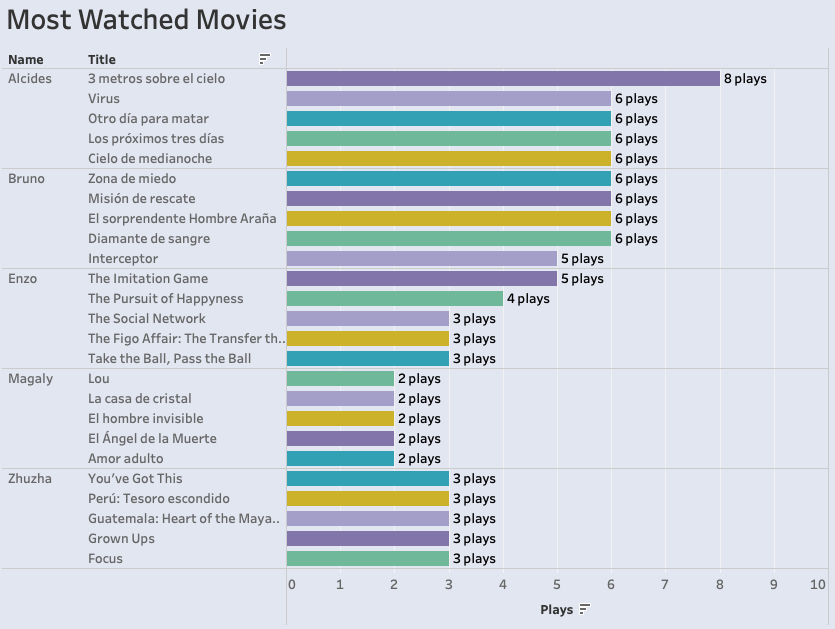

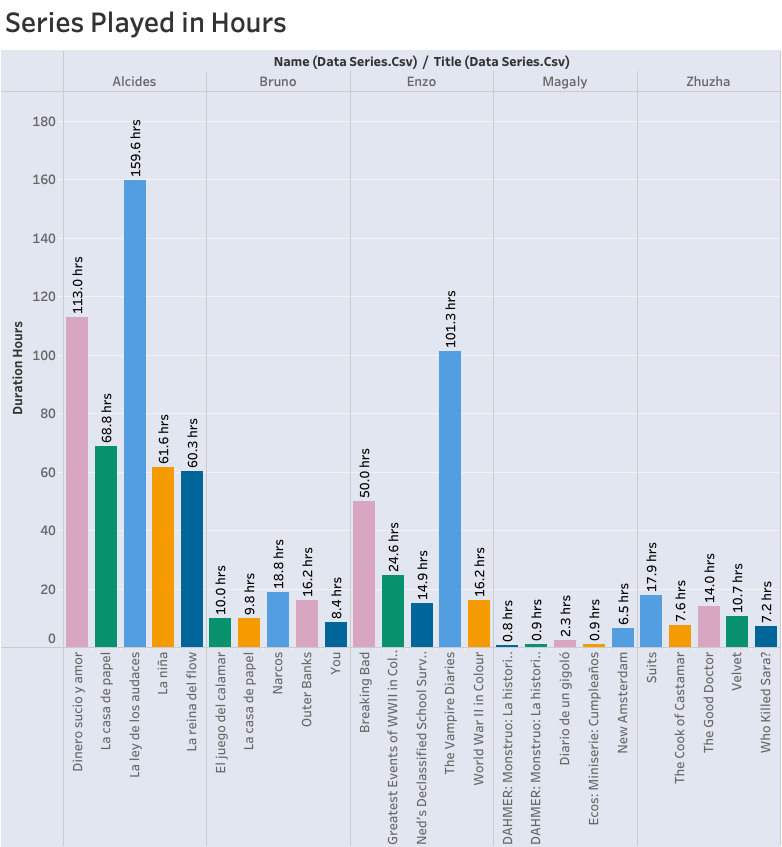

# To see the following interactive visualization: 

https://public.tableau.com/app/profile/enzo.villafuerte/viz/NetflixProject_16678701731890/NetflixProject

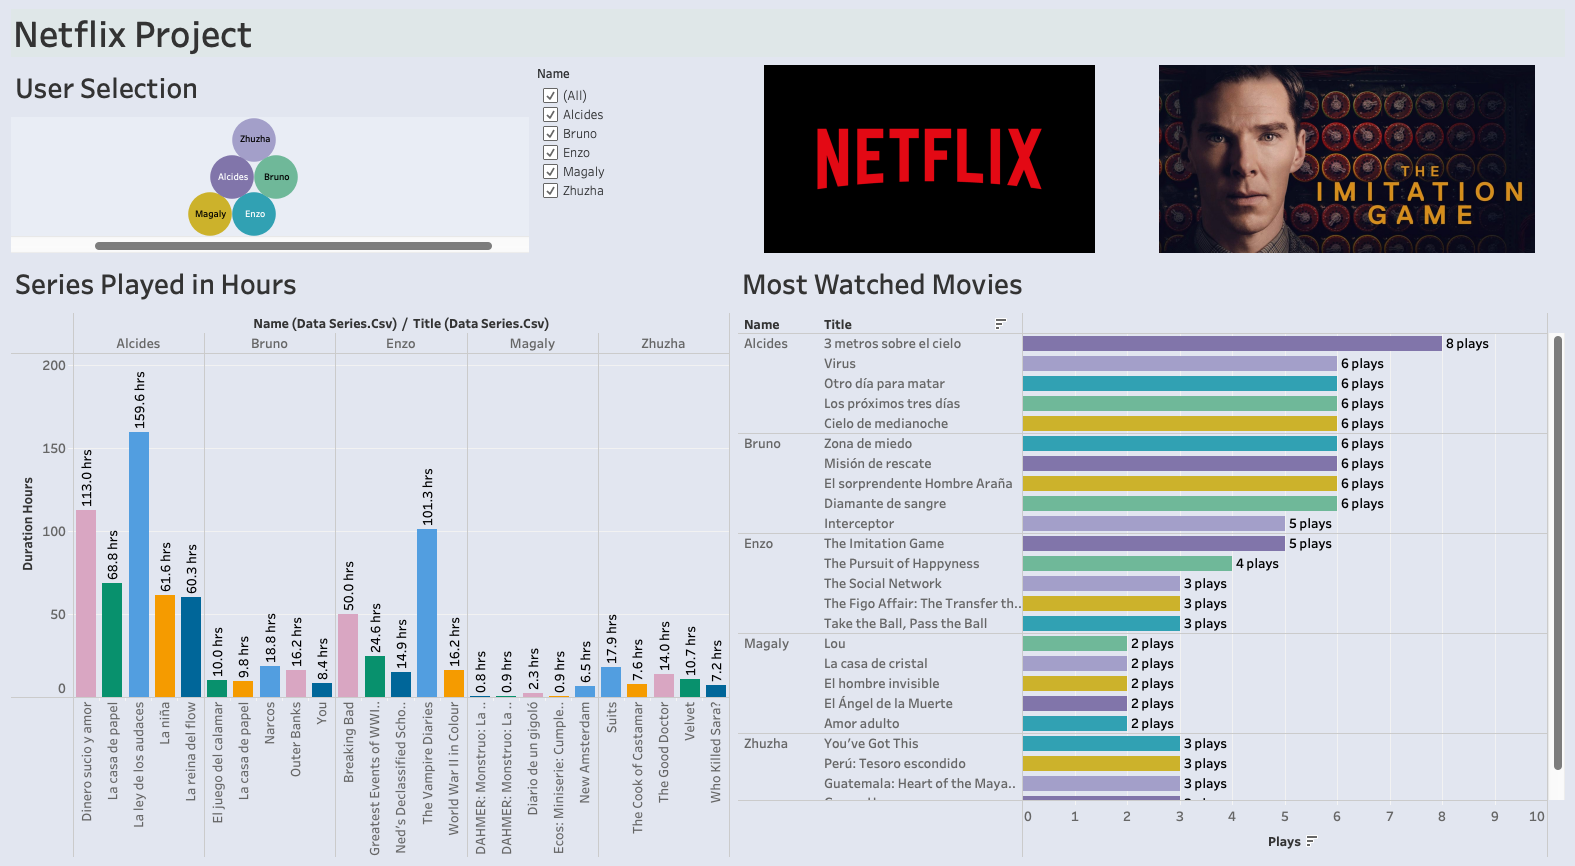